# the data analysis of the wind farms

In [117]:
# upload the data from .xslx files
import pandas as pd
Dataset_WF_site1 = pd.read_excel(r'data/Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2 = pd.read_excel(r'data/Wind farm site 2 (Nominal capacity-200MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site3 = pd.read_excel(r'data/Wind farm site 3 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site4 = pd.read_excel(r'data/Wind farm site 4 (Nominal capacity-66MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site5 = pd.read_excel(r'data/Wind farm site 5 (Nominal capacity-36MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site6 = pd.read_excel(r'data/Wind farm site 6 (Nominal capacity-96MW).xlsx'
                                ).drop(index=0)

In [5]:
Dataset_WF_site2.head()

Time(year-month-day h:m:s)  Wind speed at height of 10 meters (m/s)  \
1        2019-01-01 00:15:00                                    2.951   
2        2019-01-01 00:30:00                                    2.951   
3        2019-01-01 00:45:00                                    2.186   
4        2019-01-01 01:00:00                                    2.033   
5        2019-01-01 01:15:00                                    2.339   

   Wind direction at height of 10 meters (˚)  \
1                                    129.697   
2                                    124.756   
3                                    129.019   
4                                    121.358   
5                                    131.853   

   Wind speed at height of 30 meters (m/s)  \
1                                    2.951   
2                                    3.563   
3                                    2.339   
4                                    1.880   
5                                    3.563   

   Wind direction at height of 30 meters (˚)  \
1                                    118.488   
2                                    118.210   
3                                    112.761   
4                                    105.626   
5                                    122.411   

   Wind speed at height of 50 meters (m/s)  \
1                                    2.951   
2                                    2.798   
3                                    2.339   
4                                    2.186   
5                                    2.951   

   Wind direction at height of 50 meters (˚)  \
1                                     97.463   
2                                     91.528   
3                                     94.015   
4                                     99.392   
5                                    108.440   

   Wind speed - at the height of wheel hub (70 m) (m/s)  \
1                                              2.186      
2                                              2.492      
3                                              1.281      
4                                              2.186      
5                                              2.033      

   Wind speed - at the height of wheel hub (70 m)  (˚)  \
1                                            108.914     
2                                             97.322     
3                                             99.393     
4                                             95.703     
5                                            107.327     

   Air temperature  (°C)   Atmosphere (hpa)  Relative humidity (%)  Power (MW)  
1                 -12.992           887.227                 33.005   36.811337  
2                 -12.745           887.094                 33.000   31.172535  
3                 -12.904           887.214                 33.004   27.836002  
4                 -12.979           887.227                 33.005   31.192802  
5                 -12.772           887.107                 33.000   35.726536

In [148]:
for dataset in [Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6]:
    dataset.columns=['time','WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_cen','WD_cen','Air_T','Air_P','Air_H','Power(MW)']

In [149]:
Dataset_WF_site1.head()

time  WS_10   WD_10  WS_30   WD_30  WS_50   WD_50  WS_cen  \
1  2019-01-01 00:15:00  1.828  77.460  1.698  75.048  1.757  88.733   1.882   
2  2019-01-01 00:30:00  2.193  86.700  2.313  84.688  2.344  89.100   2.350   
3  2019-01-01 00:45:00  2.654  78.160  2.494  74.939  2.574  87.267   2.808   
4  2019-01-01 01:00:00  2.249  94.297  2.192  91.140  2.558  96.900   2.924   
5  2019-01-01 01:15:00  1.974  92.933  1.980  91.921  2.049  97.000   2.137   

    WD_cen   Air_T    Air_P   Air_H  Power(MW)  
1   74.367 -13.691  889.575  76.757   0.329703  
2   89.000 -13.766  889.942  76.981   0.296306  
3   82.733 -13.691  889.675  76.821   0.187590  
4   92.967 -13.447  890.025  74.571   0.081005  
5  100.133 -13.983  889.692  71.808   0.189721

In [176]:
# missing data and outliers processing
from collections import Counter
# Counter(Dataset_WF_site1['WS_10']).most_common()
Dataset_WF_site3['Air_T'].value_counts()

 26.460    11194
 0.000       429
 25.250       58
 14.810       58
 11.960       56
           ...  
-2.107         1
-2.186         1
-2.256         1
-2.336         1
-5.178         1
Name: Air_T, Length: 10938, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


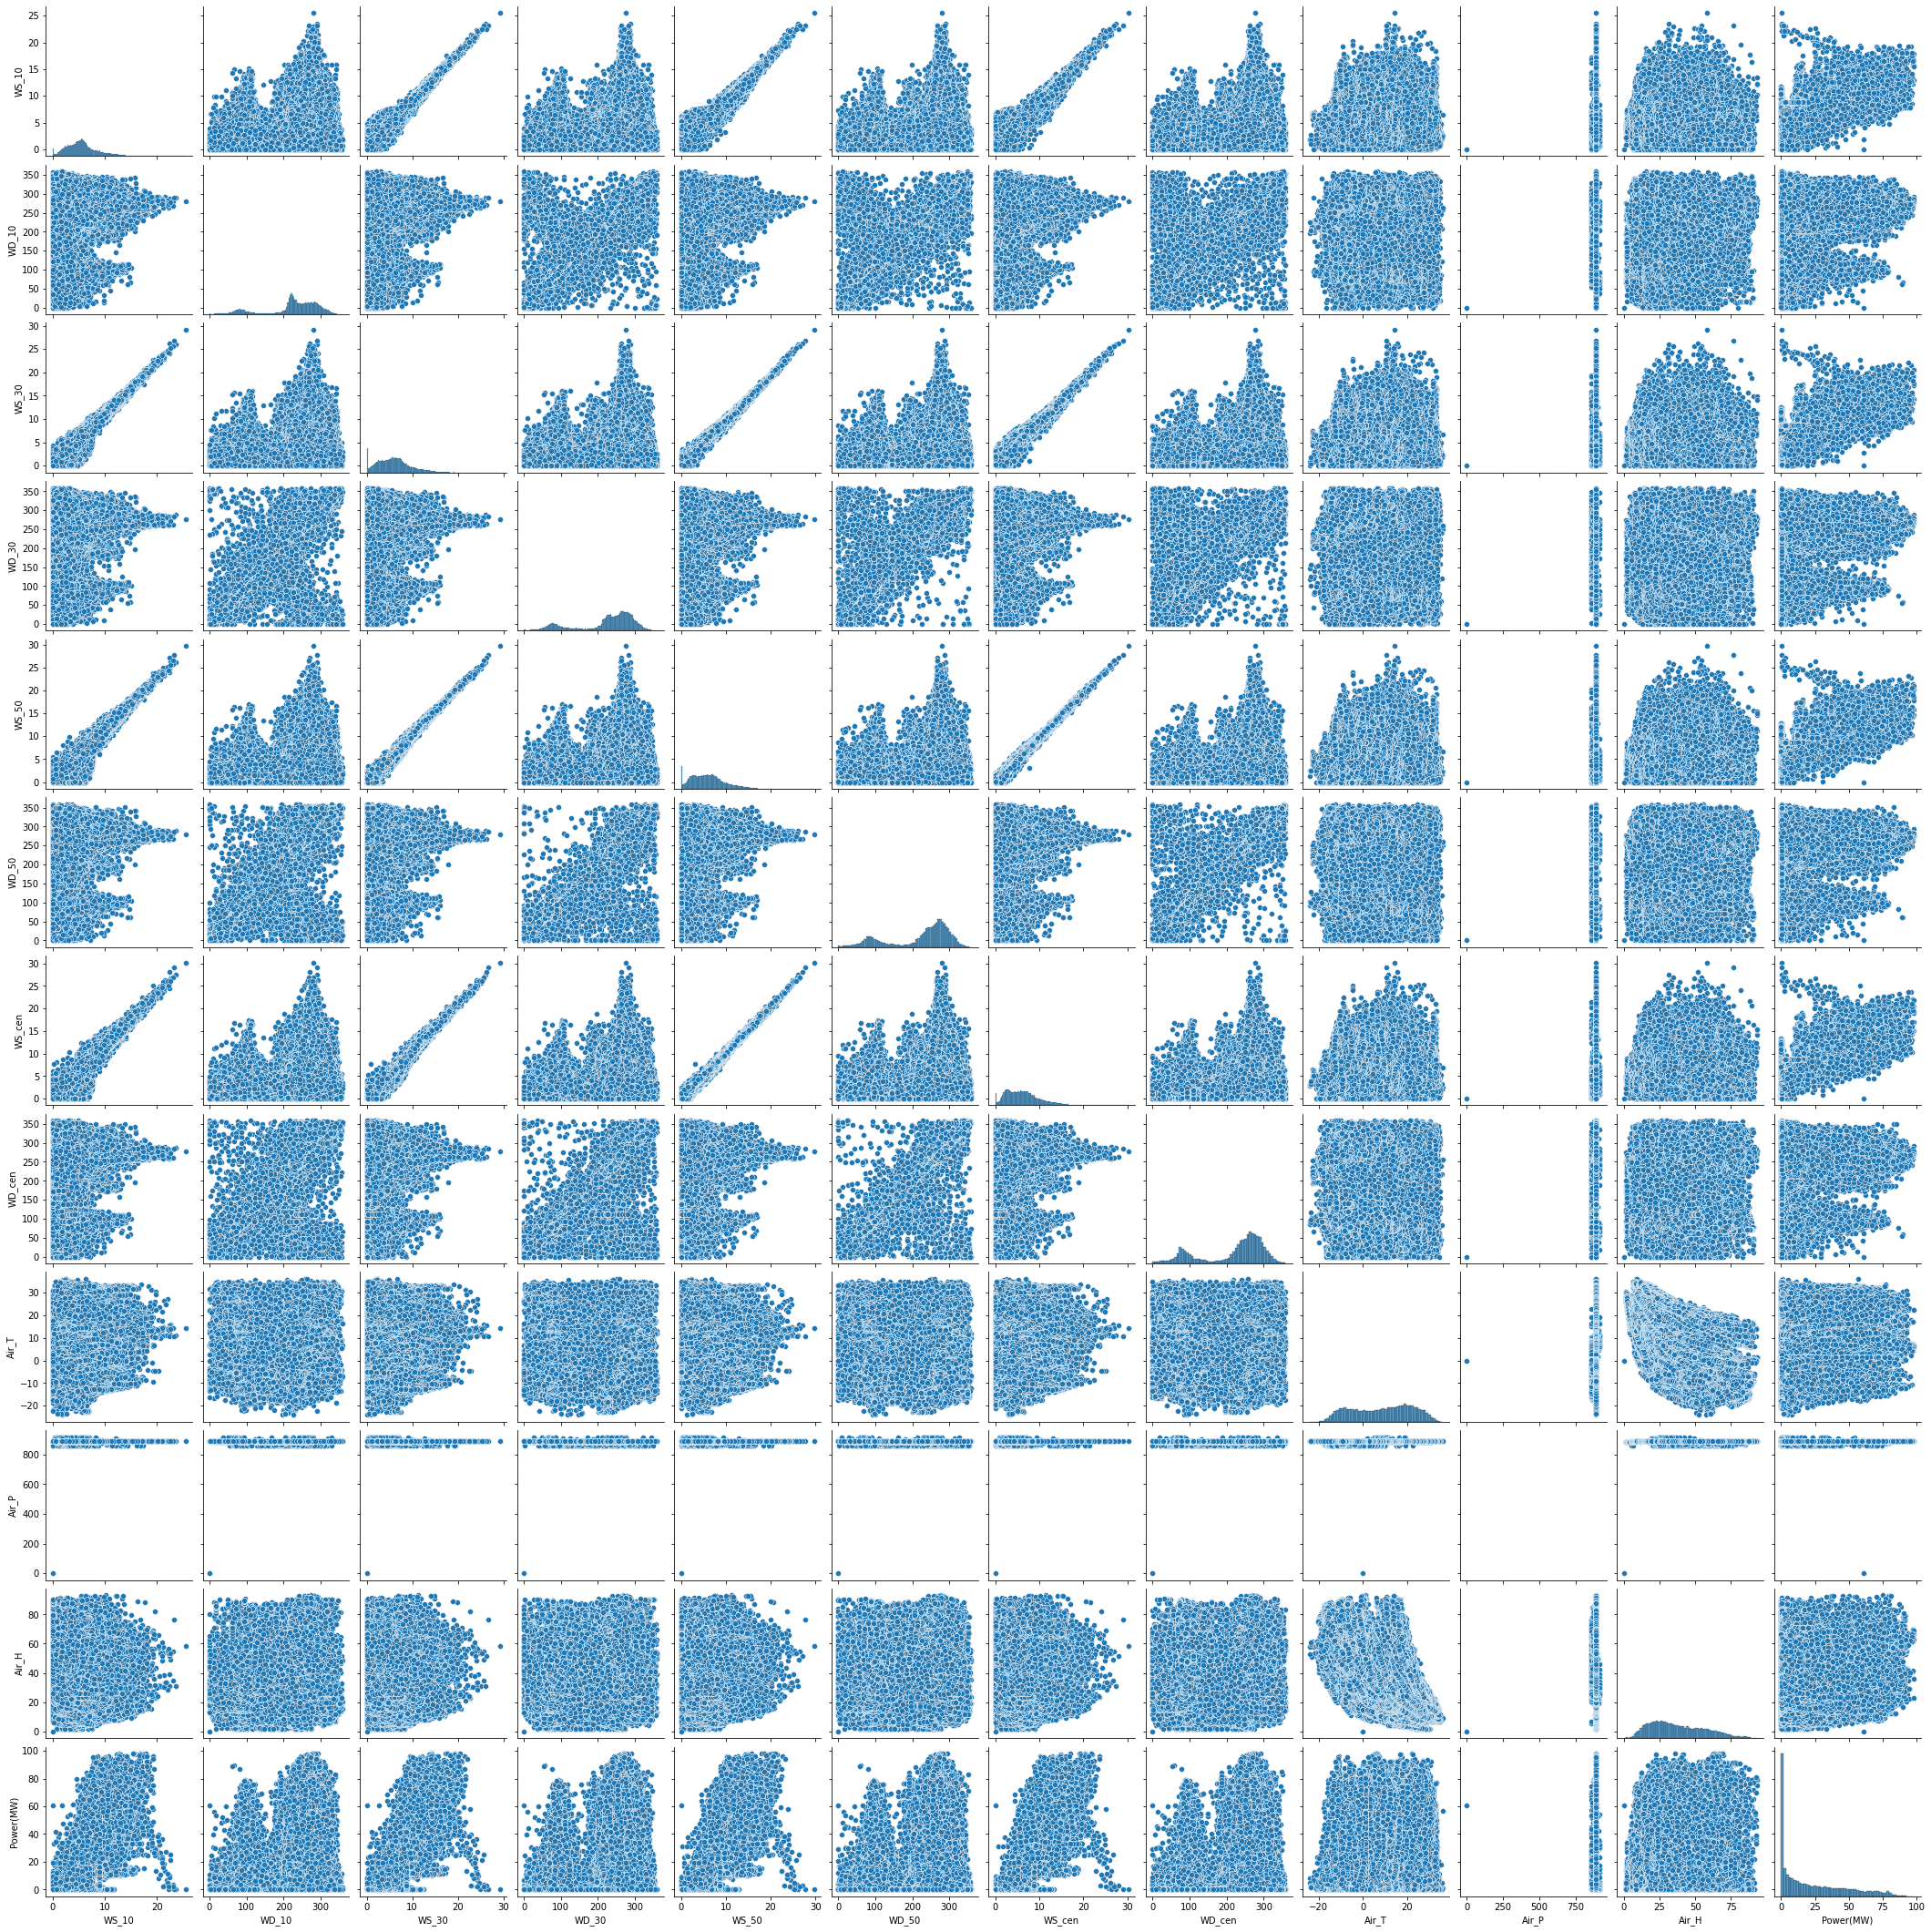

In [10]:
import seaborn as sns
sns.pairplot(Dataset_WF_site1, hue=None, size=2.5)

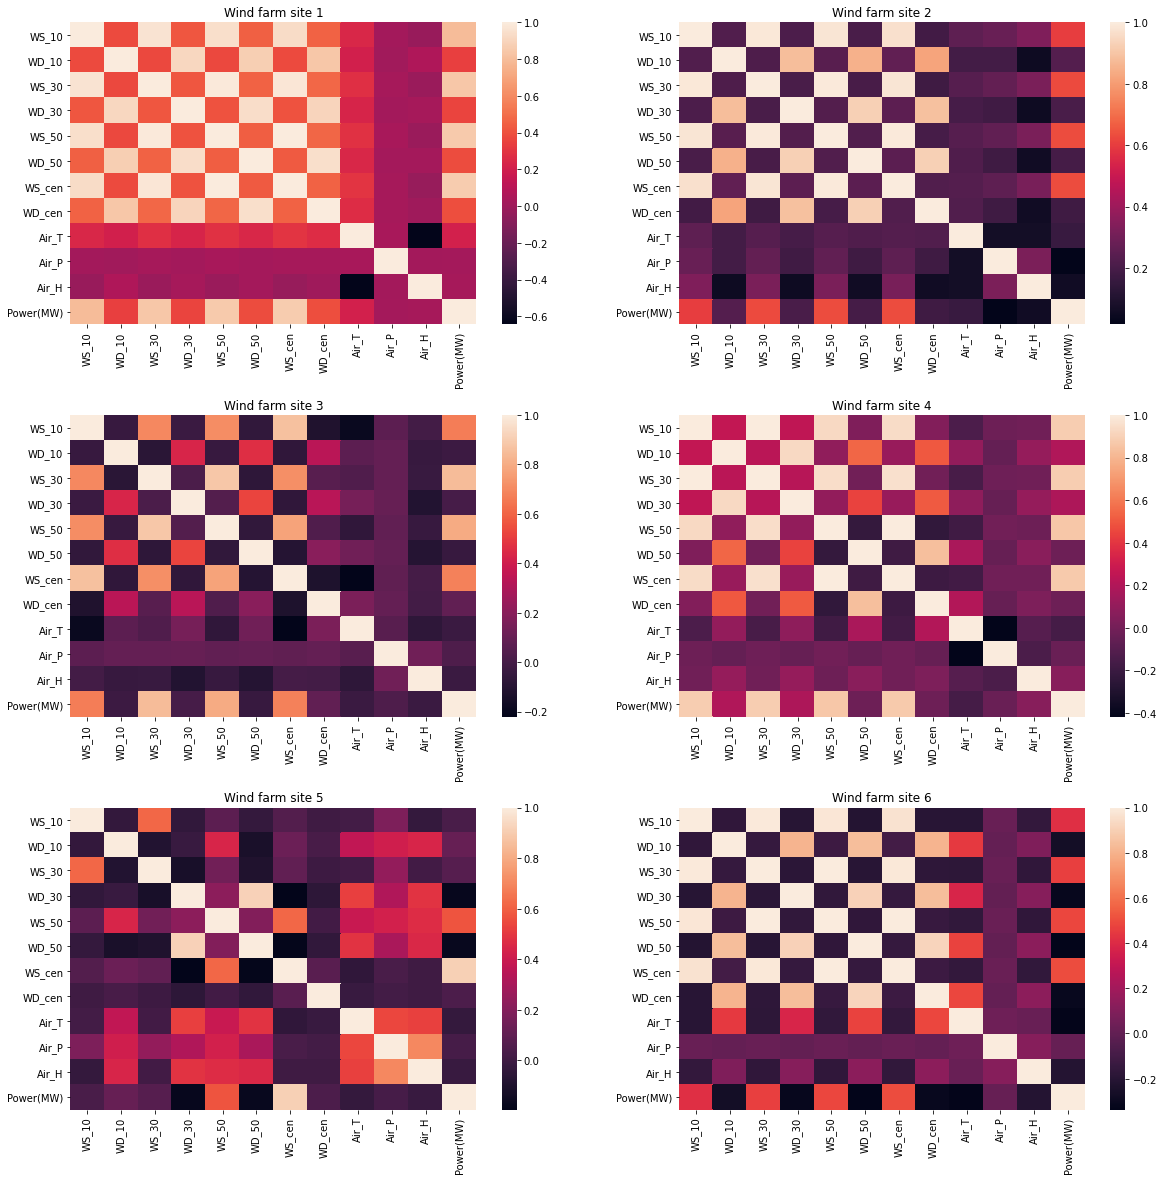

In [152]:
from matplotlib import pyplot as plt
import math
from pylab import *
fig, axes = plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
for data, i in zip([Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6],
                  range(6)):
    sns.heatmap(data.corr(), ax=axes[math.floor(i/2)][i%2]).set(title=f'Wind farm site {i+1}')
plt.savefig('./Figures/WF_correlation')

# the analysis of the solar stations

In [136]:
# upload the data from .xslx files
import pandas as pd
Dataset_SS_site1 = pd.read_excel(r'data/Solar station site 1 (Nominal capacity-50MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site2 = pd.read_excel(r'data/Solar station site 2 (Nominal capacity-130MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site3 = pd.read_excel(r'data/Solar station site 3 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site4 = pd.read_excel(r'data/Solar station site 4 (Nominal capacity-130MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site5 = pd.read_excel(r'data/Solar station site 5 (Nominal capacity-110MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site6 = pd.read_excel(r'data/Solar station site 6 (Nominal capacity-35MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site7 = pd.read_excel(r'data/Solar station site 7 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site8 = pd.read_excel(r'data/Solar station site 8 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)

<ipython-input-136-ba19886aa06e>:9: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  Dataset_SS_site4 = pd.read_excel(r'data/Solar station site 4 (Nominal capacity-130MW).xlsx'


In [137]:
Dataset_SS_site1.head()

Time(year-month-day h:m:s)  Total solar irradiance (W/m2)  \
1        2019-01-01 00:15:00                              0   
2        2019-01-01 00:30:00                              0   
3        2019-01-01 00:45:00                              0   
4        2019-01-01 01:00:00                              0   
5        2019-01-01 01:15:00                              0   

   Direct normal irradiance (W/m2)  Horizontal irradiance (W/m2)  \
1                                0                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   
5                                0                             0   

   Air temperature  (°C)   Atmosphere (hpa)  Relative humidity (%)  Power (MW)  
1                   -11.8             930.5                   39.3         0.0  
2                   -11.4             930.5                   39.0         0.0  
3                   -11.5             930.5                   38.0         0.0  
4                   -11.5             930.4                   38.9         0.0  
5                   -11.8             930.1                   39.6         0.0

In [138]:
for dataset in [Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                , Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8]:
    dataset.columns=['time','TSI','DNI','HI','Air_T','Air_P','Air_H','Power(MW)']

In [139]:
Dataset_SS_site1.head()

time  TSI  DNI  HI  Air_T  Air_P  Air_H  Power(MW)
1  2019-01-01 00:15:00    0    0   0  -11.8  930.5   39.3        0.0
2  2019-01-01 00:30:00    0    0   0  -11.4  930.5   39.0        0.0
3  2019-01-01 00:45:00    0    0   0  -11.5  930.5   38.0        0.0
4  2019-01-01 01:00:00    0    0   0  -11.5  930.4   38.9        0.0
5  2019-01-01 01:15:00    0    0   0  -11.8  930.1   39.6        0.0

In [140]:
# outliers processing
Dataset_SS_site6.isnull().sum()

time           0
TSI          574
DNI          574
HI           574
Air_T        574
Air_P        574
Air_H        574
Power(MW)      0
dtype: int64

In [141]:
Dataset_SS_site5.dropna(how='any', inplace=True)
Dataset_SS_site6.dropna(how='any', inplace=True)
Dataset_SS_site7.dropna(how='any', inplace=True)

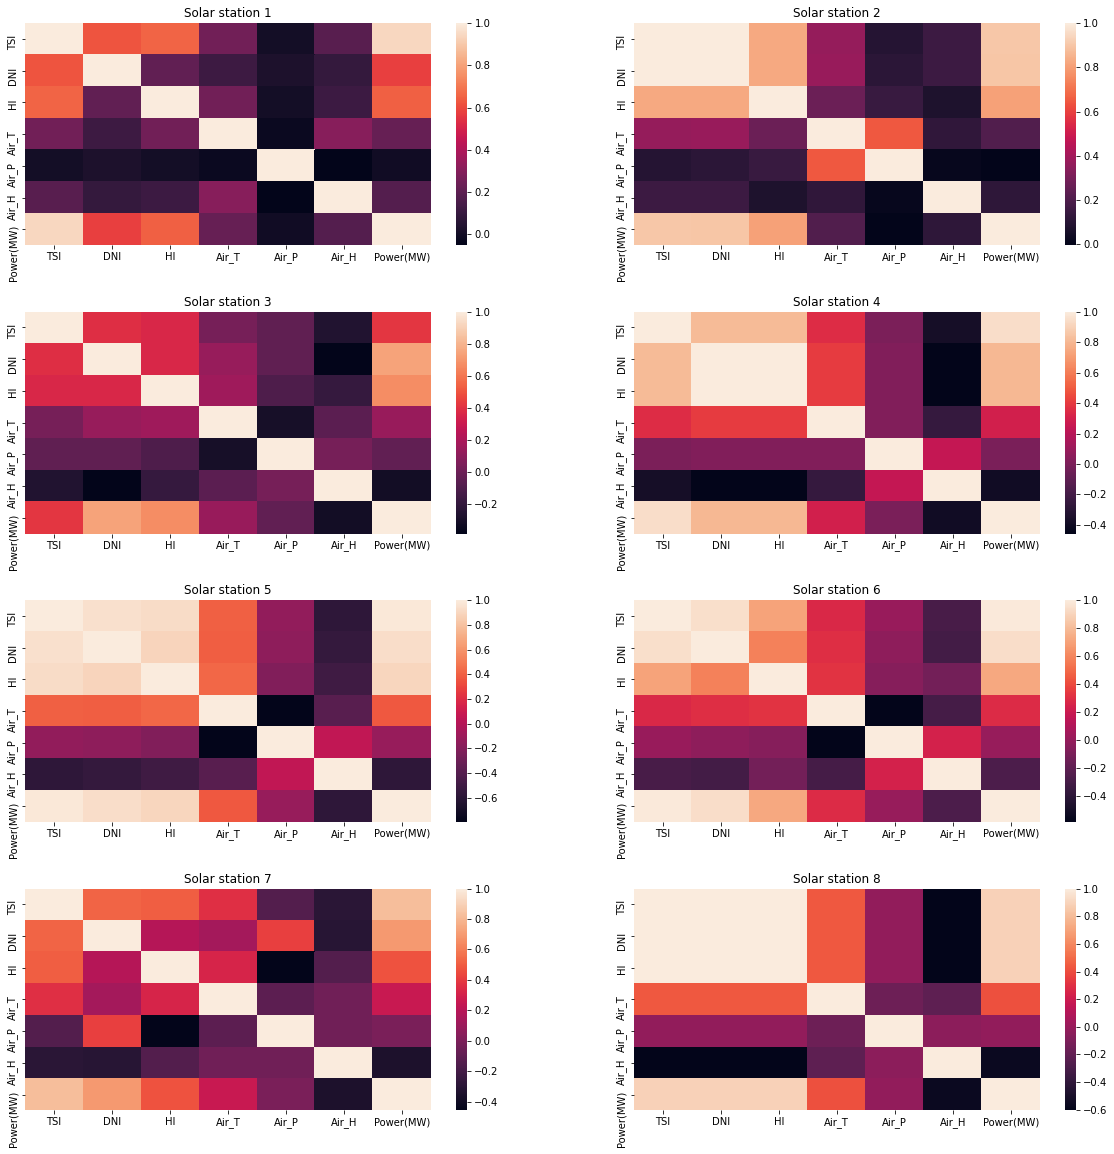

In [154]:
fig, axes = plt.subplots(4,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
for data, i in zip([Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                   ,Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8],
                  range(8)):
    sns.heatmap(data.corr(), ax=axes[math.floor(i/2)][i%2]).set(title=f'Solar station {i+1}')
plt.savefig('./Figures/SS_correlation')

# plot the missing data situation of wind farm and solar station

In [181]:
Num_WF_site1_missing_sample = 76 # from 2020-05-12 01:15:00 to 2020-05-12 20:00:00
Num_WF_site1_outlier = 0

Num_WF_site2_missing_sample = 76
Num_WF_site2_outlier = 0

In [182]:
Dataset_WF_site2['WS_cen'].value_counts()

0.000    3300
8.765     502
9.530     472
9.224     462
8.612     452
         ... 
2.674       1
4.776       1
2.268       1
1.624       1
3.608       1
Name: WS_cen, Length: 3582, dtype: int64

Text(0.5, 0, 'Wind speed at height of wheel hub')

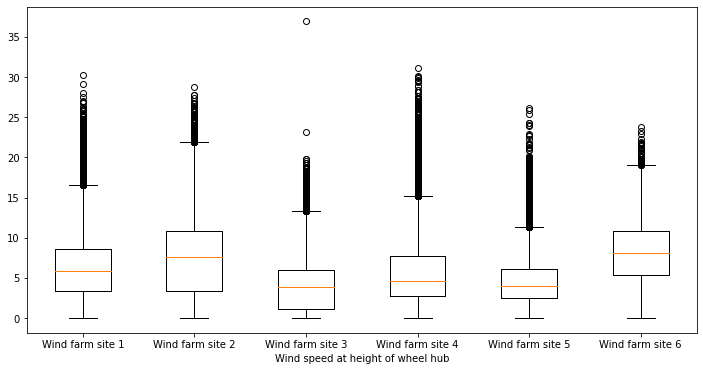

In [255]:
# drop value -99 in Wind farm site 2 and site 6
WS_name = ['Wind farm site 1', 'Wind farm site 2', 'Wind farm site 3', 'Wind farm site 4', 'Wind farm site 5', 'Wind farm site 6']
plt.figure(figsize=(12,6))
plt.boxplot([Dataset_WF_site1.WS_cen
             ,Dataset_WF_site2.drop(Dataset_WF_site2[Dataset_WF_site2['WS_cen'] == -99].index).WS_cen
             ,Dataset_WF_site3.WS_cen
             ,Dataset_WF_site4.WS_cen.dropna()
             ,Dataset_WF_site5.WS_cen
             ,Dataset_WF_site6.drop(Dataset_WF_site6[Dataset_WF_site6['WS_cen'] == -99].index).WS_cen]
             ,labels=WS_name);
plt.xlabel('Wind speed at height of wheel hub')

Text(0.5, 0, 'Total solar irradiance')

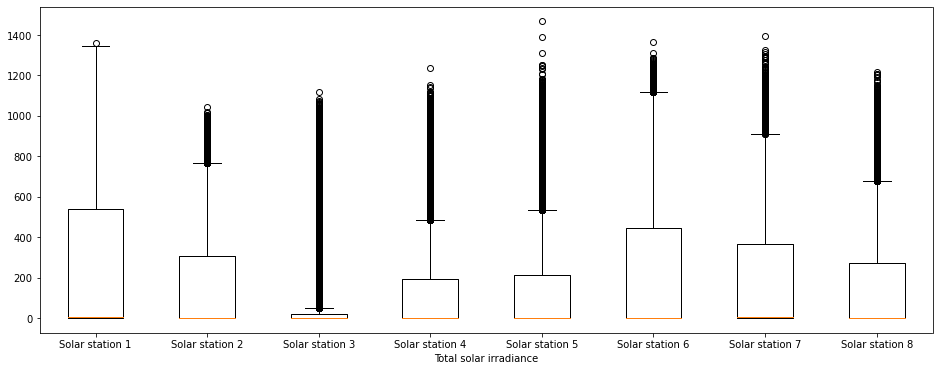

In [256]:
SS_name = ['Solar station 1', 'Solar station 2', 'Solar station 3', 'Solar station 4', 'Solar station 5', 'Solar station 6'
           , 'Solar station 7', 'Solar station 8']
plt.figure(figsize=(16,6))
plt.boxplot([Dataset_SS_site1.drop(Dataset_SS_site1[(Dataset_SS_site1['TSI'] == -99)|(Dataset_SS_site1['TSI'] == '<null>')].index).TSI
             ,Dataset_SS_site2.drop(Dataset_SS_site2[(Dataset_SS_site2['TSI'] == -99)|(Dataset_SS_site2['TSI'] == '<null>')].index).TSI
             , Dataset_SS_site3.TSI
             ,Dataset_SS_site4.TSI, Dataset_SS_site5.TSI, Dataset_SS_site6.TSI
             ,Dataset_SS_site7.drop(Dataset_SS_site7[(Dataset_SS_site7['TSI'] < 0)|(Dataset_SS_site7['TSI'] >3000)].index).TSI
             ,Dataset_SS_site8.TSI], labels=SS_name);
plt.xlabel('Total solar irradiance')

In [296]:
# plot the number of missing data and outliers
statistic = Dataset_WF_site2.describe()
statistic

WS_10         WD_10         WS_30         WD_30         WS_50  \
count  70175.000000  70175.000000  70175.000000  70175.000000  70175.000000   
mean       6.227269    217.613551      7.058625    216.522537      7.297982   
std        4.929299     87.071233      5.329943     89.759781      5.467425   
min      -99.000000    -99.000000    -99.000000    -99.000000    -99.000000   
25%        3.028000    135.873000      3.436000    123.346000      3.516000   
50%        6.470000    248.660000      7.288000    265.591000      7.525000   
75%        9.108000    296.019500     10.142000    295.088000     10.453000   
max       23.300000    359.916000     27.125000    360.000000     28.196000   

              WD_50        WS_cen        WD_cen         Air_T         Air_P  \
count  70175.000000  70175.000000  70175.000000  70175.000000  70175.000000   
mean     208.742419      7.455671    206.799319      8.614907    877.413412   
std       87.357356      5.657089     87.002253     13.509332     72.377016   
min      -99.000000    -99.000000    -99.000000    -99.000000    -99.000000   
25%      114.619500      3.359000    114.138000     -3.450000    880.570000   
50%      256.751000      7.631000    243.134000     10.274000    884.022000   
75%      285.056500     10.770000    283.763000     19.956500    887.528500   
max      359.889000     28.808000    359.802000     37.590000    900.450000   

              Air_H     Power(MW)  
count  70175.000000  70175.000000  
mean      33.266920     72.681263  
std        7.989529     55.720435  
min      -99.000000      0.000000  
25%       32.776000     14.006667  
50%       32.908000     75.365135  
75%       33.056000    124.271572  
max       97.580000    201.248080

In [360]:
# missing data and outliers rate calculation for Wind farms
WF_missing_num = [0]*6
WF_outliers_num = [0]*6
WF_MO_rate = [0]*6
for i, data in zip(range(6),[Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6]):
    WF_outliers_num[i] = num_of_mo(data)

WF_missing_num[0] =76
WF_missing_num[1] = Dataset_WF_site2[Dataset_WF_site2['WS_cen']==-99].shape[0]
WF_missing_num[2] = Dataset_WF_site3[Dataset_WF_site3['Air_P']==-0.00].shape[0]
WF_missing_num[3] = Dataset_WF_site4[Dataset_WF_site4['WS_cen'].isnull()].shape[0]
WF_missing_num[4] = Dataset_WF_site5[Dataset_WF_site5['Air_P'].isnull()].shape[0]
WF_missing_num[5] = Dataset_WF_site6[Dataset_WF_site6['WS_cen']==-99].shape[0]

WF_MO_num = np.sum([WF_missing_num, WF_outliers_num], axis=0)

for i, num, data in zip(range(6), WF_MO_num, [Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6]):
    WF_MO_rate[i] = format(num/data.shape[0], '0.2%')

In [373]:
# missing data and outliers rate calculation for Solar station
SS_missing_num = [0]*8
SS_outliers_num = [0]*8
SS_MO_rate = [0]*8
for i, data in zip(range(8),[Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                             ,Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8]):
    SS_outliers_num[i] = num_of_mo(data, column_name='TSI')

SS_missing_num[0] = Dataset_SS_site1[Dataset_SS_site1['TSI']==-99].shape[0]
SS_missing_num[1] = Dataset_SS_site2[Dataset_SS_site2['TSI']==-99].shape[0]
SS_missing_num[2] = 32256
SS_missing_num[3] = 0
SS_missing_num[4] = 46
SS_missing_num[5] = 458
SS_missing_num[6] = 459
SS_missing_num[7] = 0

SS_MO_num = np.sum([SS_missing_num, SS_outliers_num], axis=0)
for i, num, data in zip(range(8), SS_MO_num, [Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                             ,Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8]):
    SS_MO_rate[i] = format(num/data.shape[0], '0.2%')

In [313]:
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    l = min(x[x>Lower_Fence])
    return [u,l]

def num_of_mo(data, column_name='WS_cen'):
    u,l = iqr_fence(data[column_name])
    num = data[data[column_name] > u].shape[0]
    rate = format(num/data.shape[0], '0.2%')
    return num

# seasonal classification

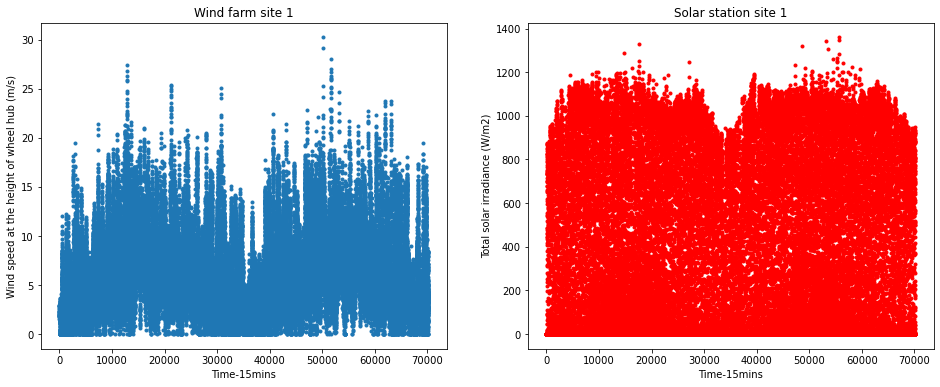

In [394]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(Dataset_WF_site1.WS_cen,'.')
plt.xlabel('Time-15mins')
plt.ylabel('Wind speed at the height of wheel hub (m/s)')
plt.title('Wind farm site 1')
plt.subplot(1,2,2)
plt.plot(Dataset_SS_site1.drop(Dataset_SS_site1[Dataset_SS_site1['TSI']==-99].index).TSI, '.', c='r')
plt.xlabel('Time-15mins')
plt.ylabel('Total solar irradiance (W/m2)')
plt.title('Solar station site 1')
plt.savefig('./Figures/seasonal')